In [1]:
import torch
model = torch.load('resnet.ckpt').to('cuda')

In [2]:
import numpy as np
import glob
data_input_dir = '\\dataset'
image_count = 50

image_list=[]
for idx, image in enumerate(glob.glob(pathname=os.getcwd()+data_input_dir+'\\*.npy')):
    if idx==image_count:
        break
    image_list.append(np.load(image))
dataset = torch.tensor(np.asarray(image_list), dtype=torch.float)

In [3]:
dataset.shape
out = model(dataset[0:50].to('cuda'))

e:\Anaconda\envs\investing\lib\site-packages\torch\nn\functional.py:3734: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [4]:
out = torch.nn.functional.relu(model.bn1(model.conv1(dataset[0:50].to('cuda'))))
out = model.layer1(out)
out = model.layer2(out)
out = model.layer3(out)
out = model.layer4(out)
out = model.layer5(out)
out = model.layer6(out)
out = torch.nn.functional.avg_pool2d(out, 2)
out = out.view(out.size(0), -1)
out = model.linear(out)

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
pca_output = pca.fit_transform(out.to('cpu').detach())

Text(0.5, 1.0, 'Principal Component of 50 datapoints')

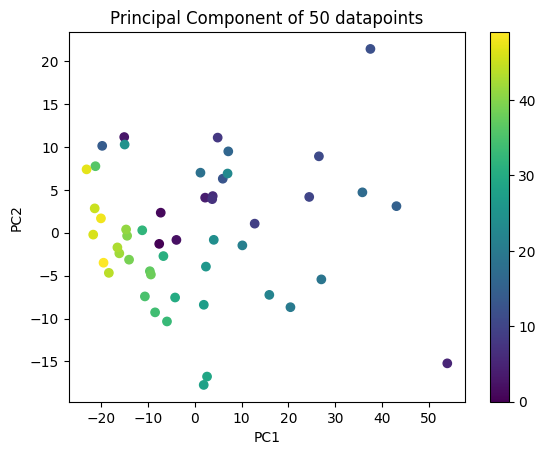

In [11]:
plt.scatter(pca_output[:,0], pca_output[:,1], c=range(50))
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component of 50 datapoints')

In [14]:
from sklearn.cluster import KMeans

kmeans_inertia=[]
for i in range(1,21):
    k_means = KMeans(n_clusters=i, init='k-means++',n_init=10,random_state=42)
    k_means.fit(pca_output)
    kmeans_inertia.append(k_means.inertia_)

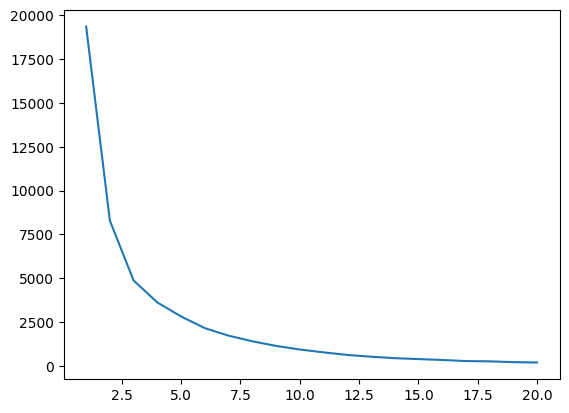

In [15]:
plt.plot(range(1,21),kmeans_inertia)

In [25]:
import pandas as pd
good_k_means= KMeans(n_clusters=3, init='k-means++',n_init=10,random_state=42)
good_k_means.fit(pca_output)
#colors= pd.DataFrame(good_k_means.labels_, columns=['colors'])
#colors['colors']=colors['colors'].map({0:'first',1:'second',2:'third'})

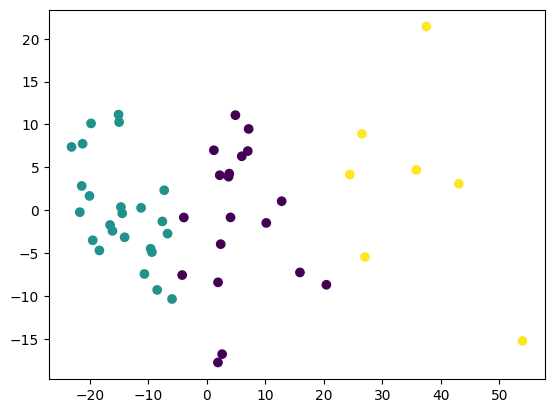

In [32]:
plt.scatter(pca_output[:,0], pca_output[:,1], c=good_k_means.labels_)